In [17]:
from aitlas.datasets import GTADataset
from aitlas.utils import image_loader
from aitlas.models import DeepLabV3
from aitlas.transforms import MinMaxNormTranspose

Total number of patches: 77


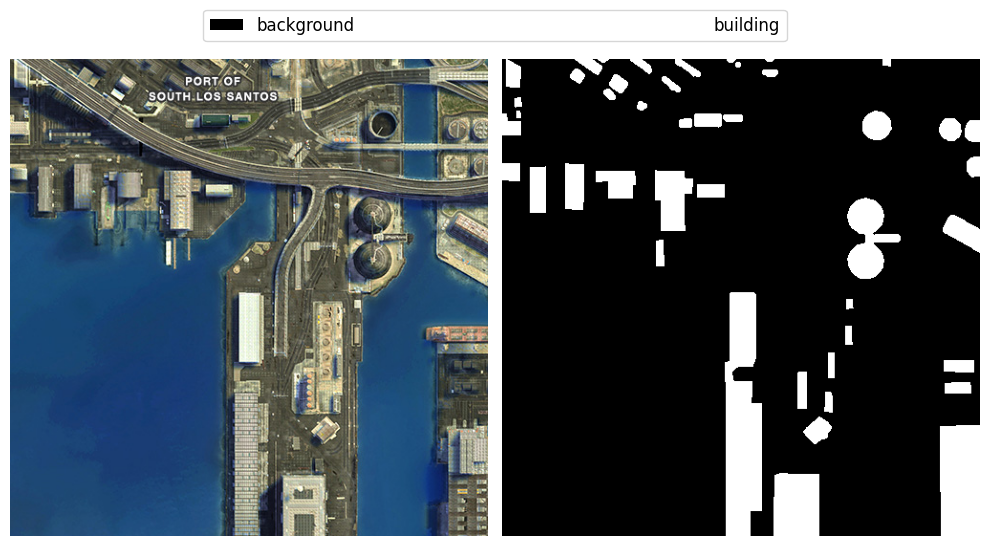

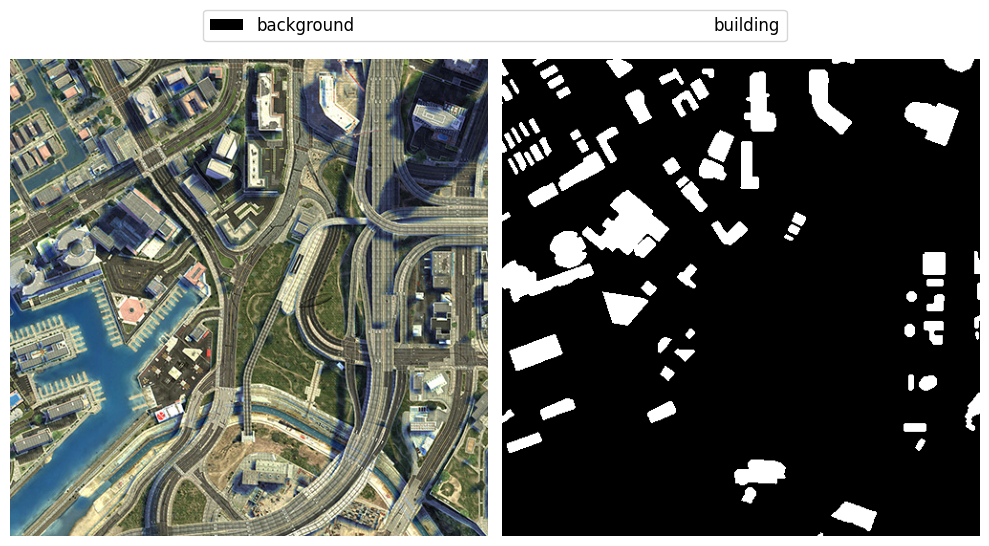

In [18]:
dataset_config = {
    "data_dir": "/home/dragik/data/semseg/buildings/GTA-V-SID/./train"
}
dataset = GTADataset(dataset_config)

print(f"Total number of patches: {len(dataset)}")
dataset.show_image(11);
dataset.show_image(26);

In [19]:
dataset.data_distribution_table()

,Number of pixels
background,17024910.0
building,2225090.0


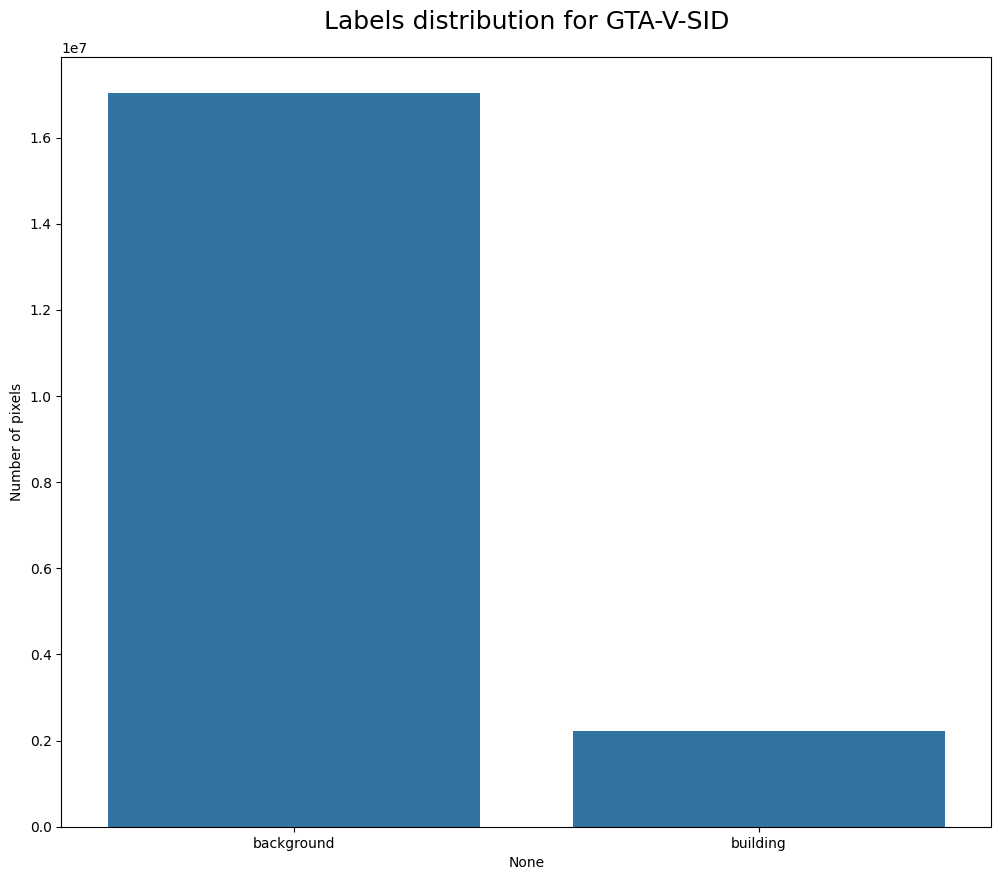

In [6]:
dataset.data_distribution_barchart();

# Load training data #

In [20]:
train_dataset_config = {
    "batch_size": 16,
    "shuffle": True,
    "num_workers": 4,
    "data_dir": "/home/dragik/data/semseg/buildings/GTA-V-SID/./train",
    "transforms": ["aitlas.transforms.MinMaxNormTranspose"],
    "target_transforms": ["aitlas.transforms.Transpose"]
}
train_dataset = GTADataset(train_dataset_config)
len(train_dataset)

77

## Create the model ##

In [10]:
epochs = 50
model_directory = "/home/dragik/data/semseg/buildings/GTA-V-SID/experiments"
model_config = {
    "num_classes": 2, 
    "learning_rate": 0.0001,
    "pretrained": True, 
    "threshold": 0.5,
    "metrics": ["iou"]
}

model = DeepLabV3(model_config)
model.prepare()

## Start the training ##

In [11]:
model.train_model(
    train_dataset=train_dataset,
    epochs=epochs,
    model_directory=model_directory,
    run_id='1'
);

2024-04-16 08:35:48,467 INFO Starting training.
training: 100%|███████████████████████████████████████████████████████████████████████████| 5/5 [00:05<00:00,  1.09s/it]
2024-04-16 08:35:53,984 INFO epoch: 1, time: 5, loss:  0.49437
testing on train set: 100%|███████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.06it/s]
2024-04-16 08:35:56,795 INFO IOU:0.47749316416308757, IOU mean:0.4117224756476695, IOU per Class:[0.62252154 0.20092341]
training: 100%|███████████████████████████████████████████████████████████████████████████| 5/5 [00:04<00:00,  1.21it/s]
2024-04-16 08:36:00,932 INFO epoch: 2, time: 4, loss:  0.46379
testing on train set: 100%|███████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  2.64it/s]
2024-04-16 08:36:02,855 INFO IOU:0.4558343901554807, IOU mean:0.40160656080076385, IOU per Class:[0.57572412 0.227489  ]
training: 100%|███████████████████████████████████████████████████████████████████████████| 5/5 [00:

## Evaluate the model using test data ##

In [22]:
test_dataset_config = {
    "batch_size": 4,
    "shuffle": False,
    "num_workers": 4,
    "data_dir": "/home/dragik/data/semseg/buildings/GTA-V-SID/./val",
    "transforms": ["aitlas.transforms.MinMaxNormTranspose"],
    "target_transforms": ["aitlas.transforms.Transpose"]
}

test_dataset = GTADataset(test_dataset_config)
len(test_dataset)

model = DeepLabV3(model_config)
model.prepare()
model.running_metrics.reset()
model_path = "/home/dragik/data/semseg/buildings/GTA-V-SID/experiments/checkpoint.pth.tar"
model.evaluate(dataset=test_dataset, model_path=model_path)
model.running_metrics.get_scores(model.metrics)

2024-04-16 09:09:21,192 INFO Loading checkpoint /home/dragik/data/semseg/buildings/GTA-V-SID/experiments/checkpoint.pth.tar
2024-04-16 09:09:21,777 INFO Loaded checkpoint /home/dragik/data/semseg/buildings/GTA-V-SID/experiments/checkpoint.pth.tar at epoch 51
testing on test set: 100%|████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00,  6.40it/s]


[{'IOU': 0.9023132320825564,
  'IOU mean': 0.801445332715685,
  'IOU per Class': array([0.94966995, 0.65322071])}]

## Predictions ##

2024-04-16 09:12:12,408 INFO Loading checkpoint /home/dragik/data/semseg/buildings/GTA-V-SID/experiments/checkpoint.pth.tar
2024-04-16 09:12:12,850 INFO Loaded checkpoint /home/dragik/data/semseg/buildings/GTA-V-SID/experiments/checkpoint.pth.tar at epoch 51


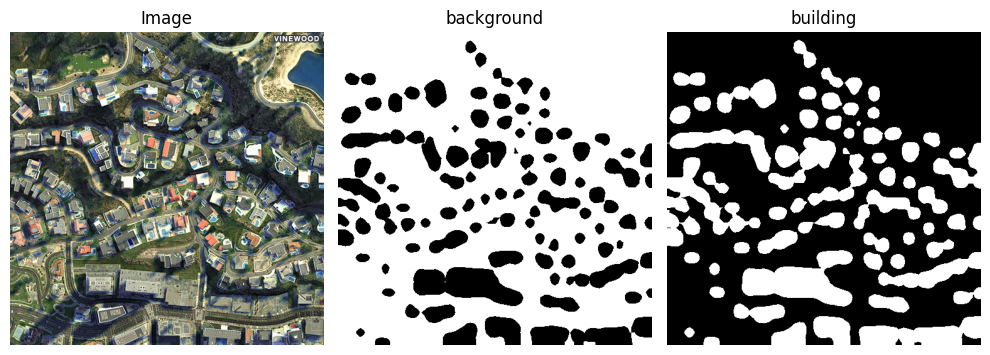

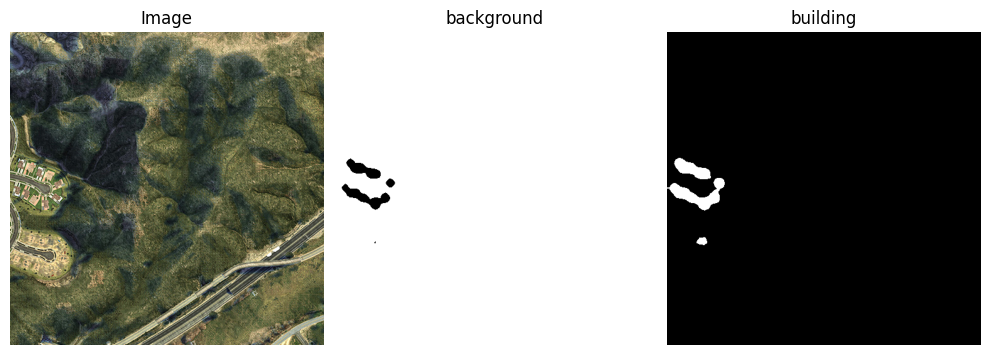

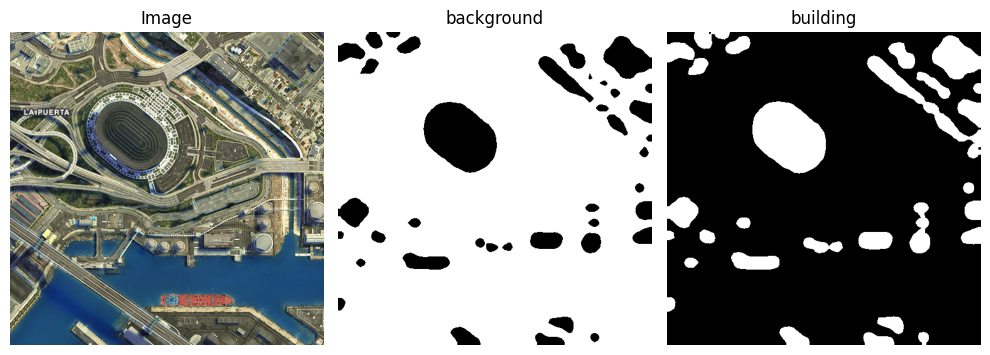

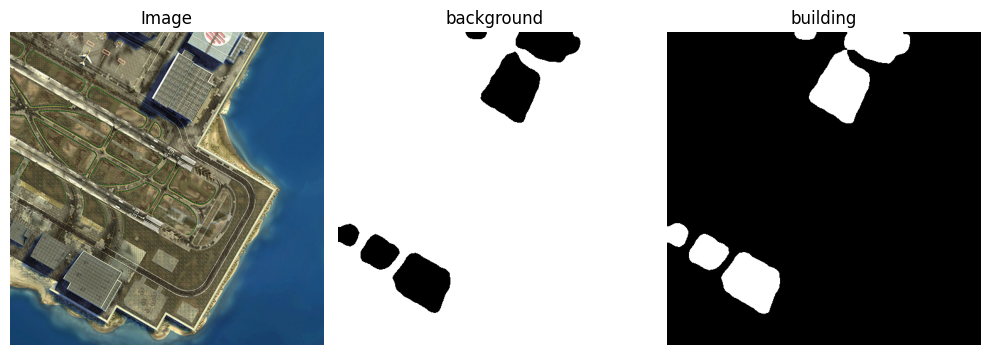

In [23]:
model_path = "/home/dragik/data/semseg/buildings/GTA-V-SID/experiments/checkpoint.pth.tar"
labels = ["background", "building"]
transform = MinMaxNormTranspose()
model.load_model(model_path)

image = image_loader('/home/dragik/data/semseg/buildings/GTA-V-SID/img_dir/test/001_000001_001001.png')
fig = model.predict_masks(image, labels, transform)

image = image_loader('/home/dragik/data/semseg/buildings/GTA-V-SID/img_dir/test/001_000751_002501.png')
fig = model.predict_masks(image, labels, transform)

image = image_loader('/home/dragik/data/semseg/buildings/GTA-V-SID/img_dir/test/001_001751_001251.png')
fig = model.predict_masks(image, labels, transform)

image = image_loader('/home/dragik/data/semseg/buildings/GTA-V-SID/img_dir/test/001_002501_000751.png')
fig = model.predict_masks(image, labels, transform)